# Task NO. 03      Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.


Dataset :- https://www.kaggle.com/c/dogs-vs-cats/data
 

In [1]:
import os
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import time


In [2]:
dataset_dir = "train111/"
train_dir = dataset_dir
confusion_image_path = os.path.join(train_dir, 'confusion_matrix.png')
classification_file_path = os.path.join(train_dir, 'classification_report.txt')
model_file_path = os.path.join(train_dir, "svm_model.pkl")


In [3]:
image_size = (50, 50)
features = []
labels = []



In [4]:
from joblib import Parallel, delayed

def process_image(image_path, image_size):
    label = 0 if image_path.startswith('cat') else 1
    image_read = cv2.imread(image_path)
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    return image_flatten, label


In [5]:
from tqdm import tqdm 


features = []
labels = []

for image_name in tqdm(os.listdir(train_dir), desc="Processing Train Images"):
    if image_name[0:3] == 'cat':
        label = 0
    else:
        label = 1
    
    image_path = os.path.join(train_dir, image_name)
    image_read = cv2.imread(image_path)
    if image_read is not None:
        image_resized = cv2.resize(image_read, image_size)
        image_normalized = image_resized / 255.0
        image_flatten = image_normalized.flatten()
        features.append(image_flatten)
        labels.append(label)

features = np.asarray(features)
labels = np.asarray(labels)


Processing Train Images: 100%|█████████████████████████████████████████████████████| 4002/4002 [00:51<00:00, 77.33it/s]


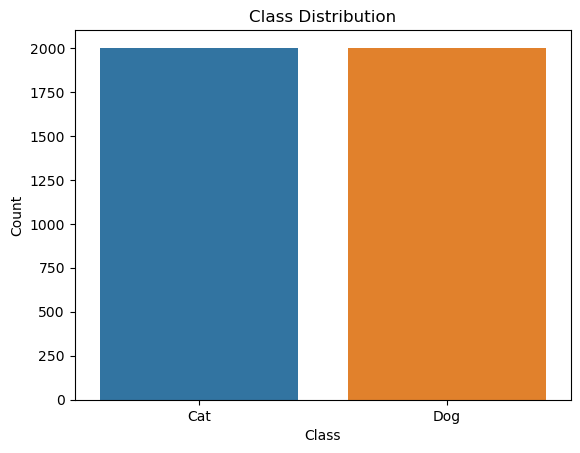

In [6]:
sns.countplot(x=labels)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Cat', 'Dog'])
plt.title('Class Distribution')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('pca', PCA(n_components=0.8, random_state=42)),
    ('svm', SVC())
])

In [8]:
param_grid = {
    'pca__n_components': [0.8],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

In [9]:
start_time = time.time()
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=4)
grid_search.fit(X_train, y_train)
end_time = time.time()


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END pca__n_components=0.8, svm__kernel=linear;, score=0.578 total time=  49.0s
[CV 2/3] END pca__n_components=0.8, svm__kernel=linear;, score=0.575 total time=  48.9s
[CV 3/3] END pca__n_components=0.8, svm__kernel=linear;, score=0.577 total time=  48.2s
[CV 1/3] END pca__n_components=0.8, svm__kernel=rbf;, score=0.636 total time=  38.5s
[CV 2/3] END pca__n_components=0.8, svm__kernel=rbf;, score=0.619 total time=  46.4s
[CV 3/3] END pca__n_components=0.8, svm__kernel=rbf;, score=0.632 total time=  30.2s
[CV 1/3] END pca__n_components=0.8, svm__kernel=poly;, score=0.573 total time=  28.6s
[CV 2/3] END pca__n_components=0.8, svm__kernel=poly;, score=0.560 total time=  29.4s
[CV 3/3] END pca__n_components=0.8, svm__kernel=poly;, score=0.574 total time=  27.9s
[CV 1/3] END pca__n_components=0.8, svm__kernel=sigmoid;, score=0.539 total time=  29.1s
[CV 2/3] END pca__n_components=0.8, svm__kernel=sigmoid;, score=0.521 tota

In [10]:
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [11]:
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)


Best Parameters:  {'pca__n_components': 0.8, 'svm__kernel': 'rbf'}
Best Score:  0.6290635020833663


In [12]:
accuracy = best_pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.66167290886392


In [13]:
y_pred = best_pipeline.predict(X_test)

In [14]:
target_names = ['Cat', 'Dog']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

         Cat       0.70      0.63      0.66       422
         Dog       0.63      0.69      0.66       379

    accuracy                           0.66       801
   macro avg       0.66      0.66      0.66       801
weighted avg       0.66      0.66      0.66       801



In [15]:
with open(classification_file_path, 'w') as file:
    file.write(classification_rep)

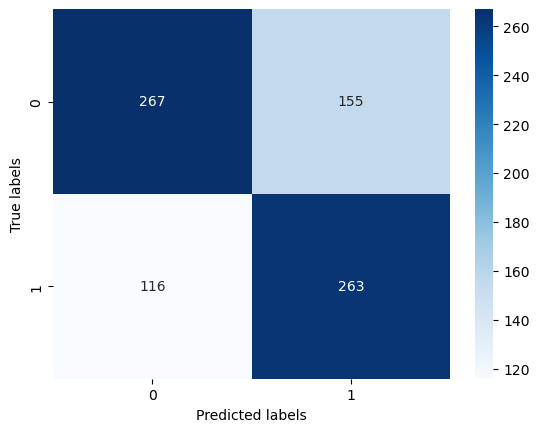

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig(confusion_image_path)
plt.show()